In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../D-STEEL/dsteel/")
from semi_analytic_catalog import generate_parents_catalogue
from HM2SM import halo_mass_to_stellar_mass
import pandas as pd

from colossus.cosmology import cosmology
cosmo = cosmology.setCosmology("planck18")

In [2]:
axis = 500

catalog = generate_parents_catalogue('tinker08', axis * cosmo.h, (10, 16, 0.05), 0.0, cosmo.h)

sm = halo_mass_to_stellar_mass(catalog, 0, formula='Grylls19', scatter = 0.11)

smM = halo_mass_to_stellar_mass(catalog, 0, formula='Moster', scatter = 0.11)

width = 0.1
mass_range = np.arange(10, 13, width)
hist = np.histogram(sm, mass_range)[0]
smf = (hist/width)/(axis**3)

histM = np.histogram(smM, mass_range)[0]
smfM = (histM/width)/(axis**3)

Generating catalogue for a volume of (338.30 Mpc/h)^3

Number of halos generated: 15817039



In [3]:
SDSS_cent = np.array([[9.106145251396647, -2.2412845326822035],
                [9.195530726256983, -2.2690513020467127],
                [9.307262569832401, -2.324354729427406],
                [9.400372439478584, -2.3384043056390063],
                [9.500931098696462, -2.379939404011608],
                [9.605214152700185, -2.421487286348005],
                [9.702048417132215, -2.435549646523401],
                [9.798882681564246, -2.4633419838155017],
                [9.906890130353817, -2.4637127187655805],
                [10.003724394785847, -2.470910090382624],
                [10.09683426443203, -2.4780946780358715],
                [10.204841713221601, -2.4716004244275975],
                [10.394785847299813, -2.4791173951395367],
                [10.595903165735567, -2.5209976605346247],
                [10.804469273743017, -2.6178234023241242],
                [10.998137802607076, -2.7969778709586692],
                [11.199255121042832, -3.058537770221034],
                [11.396648044692737, -3.381869782544775],
                [11.594040968342645, -3.7738516804520406],
                [11.798882681564246, -4.282563951778887],
                [12.003724394785849, -4.928575994272784],
                [12.093109869646183, -5.354512100021732],
                [12.189944134078214, -5.807933727931681],
                [12.301675977653632, -6.549736011147615]])

SDSS_ber = np.array([[9.045917697172133, -2.069486404833836],
                    [9.238389221444523, -2.021148036253776],
                    [9.443395695333173, -2.045317220543806],
                    [9.648458463905726, -2.1057401812688816],
                    [9.841080107335198, -2.1540785498489416],
                    [10.145521757895331, -2.214501510574017],
                    [10.344317051659756, -2.2386706948640476],
                    [10.54311234542418, -2.2628398791540776],
                    [10.748250173575277, -2.3716012084592135],
                    [10.953481826199548, -2.540785498489425],
                    [11.065489482276558, -2.673716012084591],
                    [11.165074778105122, -2.8066465256797573],
                    [11.246026533561015, -2.939577039274923],
                    [11.351916833986978, -3.132930513595165],
                    [11.414253813964836, -3.2779456193353464],
                    [11.489031919085775, -3.435045317220543],
                    [11.582556153947197, -3.6646525679758293],
                    [11.688577808635605, -3.9425981873111766],
                    [11.782158338180933, -4.2084592145015085],
                    [11.90075247227487, -4.583081570996978],
                    [12.031956615563605, -5.078549848942597],
                    [12.150832223077067, -5.6344410876132915]])

/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


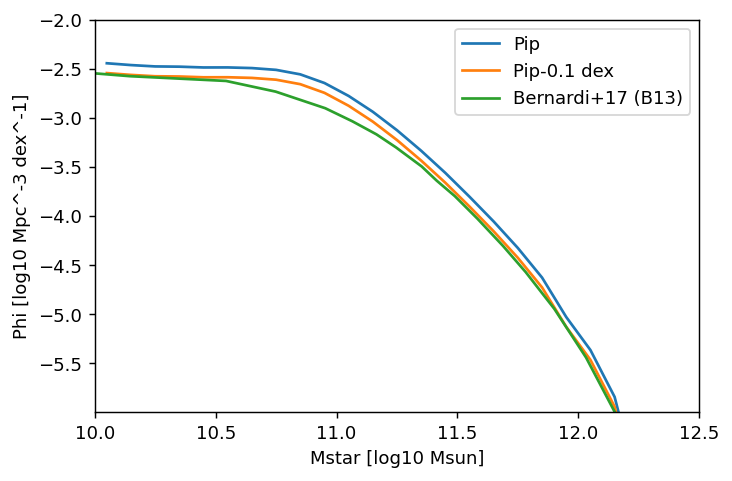

In [8]:
df = pd.DataFrame()

df['Pip_mass_range_corrected'] = mass_range[:-1] + width/2
df['Pip_log10_SMF'] = np.log10(smf)
df.to_csv("/Users/chris/Desktop/pip_prediction.csv")

df2 = pd.DataFrame()
df2['Bernardi_mass_range'] = SDSS_ber[:, 0]
df2['Bernardi_log10_smf'] = np.log10((10**SDSS_ber[:, 1])/(np.log(10)))
df2.to_csv("/Users/chris/Desktop/Bernardi17smf.csv")

plt.figure(dpi=130)
plt.plot(mass_range[:-1] + width/2, np.log10(smf), label = 'Pip')

plt.plot(mass_range[:-1] + width/2, np.log10(smf) - 0.1, label = 'Pip-0.1 dex')
#plt.plot(mass_range[:-1], np.log10(smfM), label = 'Moster')
#plt.plot(SDSS_cent[:, 0], SDSS_cent[:, 1])
ber = np.log10((10**SDSS_ber[:, 1])/(np.log(10)))
plt.plot(SDSS_ber[:, 0], ber, label = 'Bernardi+17 (B13)' )

plt.ylim([ber[-1], -2])
plt.xlim([10, 12.5])
plt.xlabel("Mstar [log10 Msun]")
plt.ylabel("Phi [log10 Mpc^-3 dex^-1]")
plt.legend()
plt.savefig("/Users/chris/Desktop/ComparePip.png")
plt.show()